# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

As a business manager, try to find out the weak areas where you can work to make more profit.


What all business problems you can derive by exploring the data? 

# By Anjali Jha

# Imported All the necesaary Libraries

Imported csv file and shown the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
data.shape

(9994, 13)

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Checking data Unique value 

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
#To see the unique values this command is used
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

# data Cleaning

First check that is there any null value in our data 

In [10]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Corelation

In [11]:
corelation = data.corr()

<AxesSubplot:>

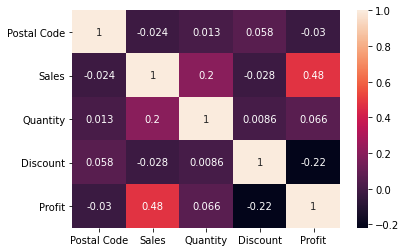

In [12]:
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels= corelation.columns, annot = True)

# Plotted graph for all non string columns

i.e., postalcode, Sales, Discounts, Quantity and Profit

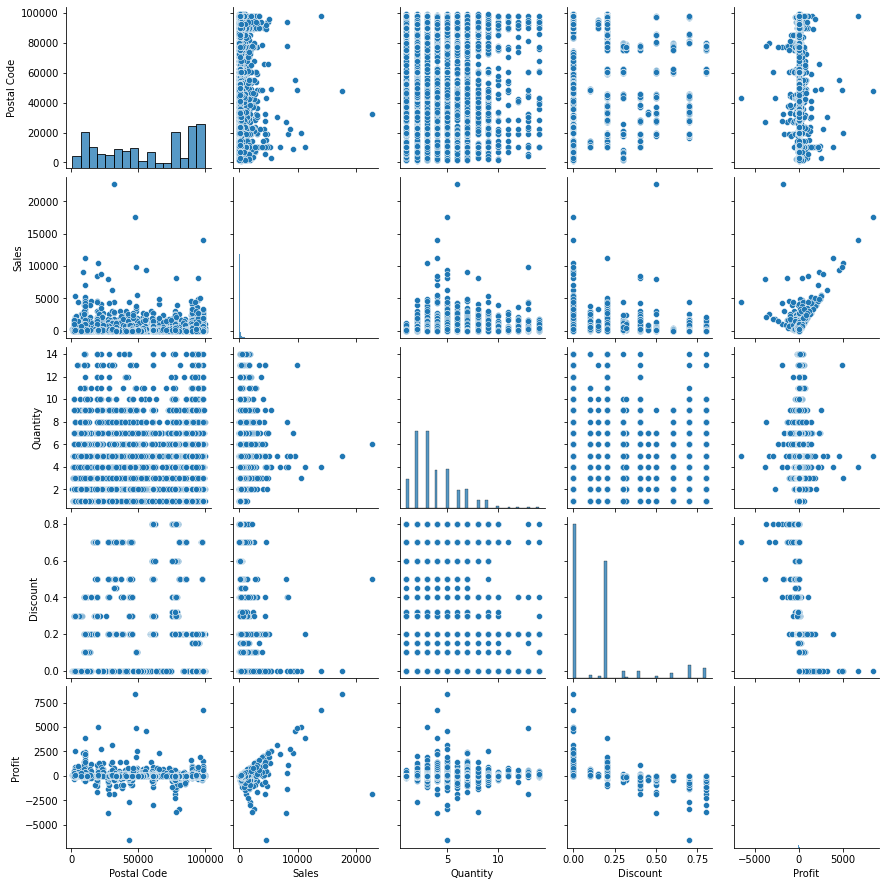

In [13]:
sns.pairplot(data)

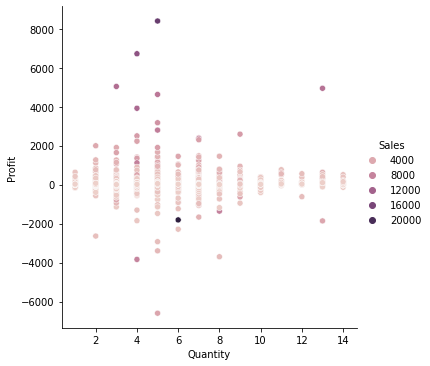

In [14]:
sns.relplot(x='Quantity', y='Profit', hue='Sales', data=data)

# realation plot of sales, discount and profit

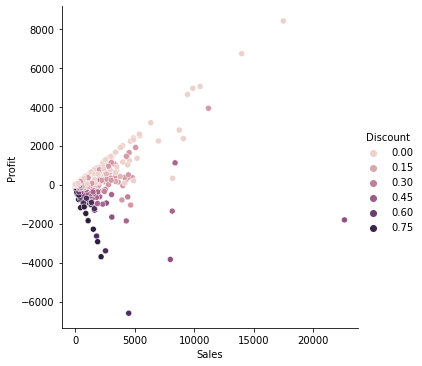

In [15]:
sns.relplot(x='Sales', y='Profit', hue='Discount', data=data)


# realation plot of sales, quantity and profit

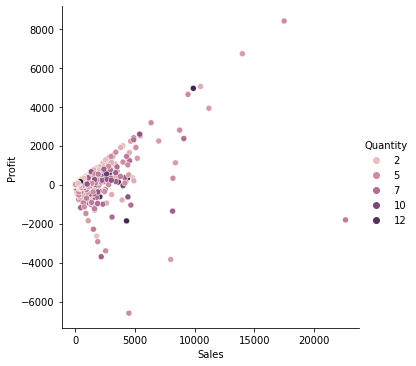

In [16]:
sns.relplot(x='Sales', y='Profit', hue='Quantity', data=data)

# realation plot of sales, Category and profit

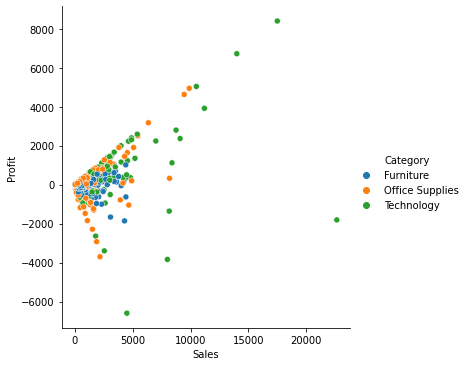

In [17]:
sns.relplot(x='Sales', y='Profit', hue='Category', data=data)

# realation plot of sales, Subcategory and profit

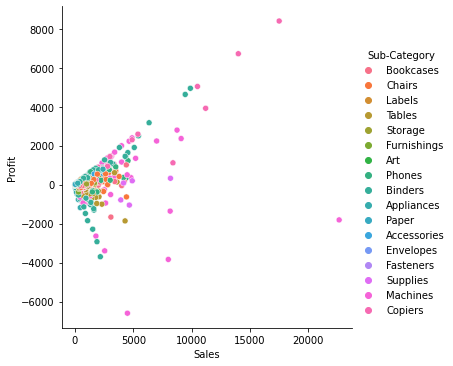

In [18]:
sns.relplot(x='Sales', y='Profit', hue='Sub-Category', data=data)

# realation plot of sales, Shipmode and profit

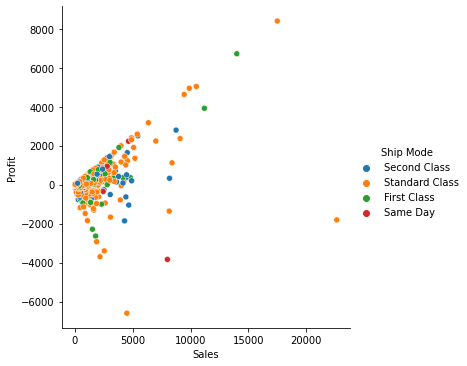

In [19]:
sns.relplot(x='Sales', y='Profit', hue='Ship Mode', data=data)

# To plot the graph of state vs Profit

# 1. State's Value is shown

In [20]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

# 2. As per the particular state the sales discount and profit table is shown

In [21]:
state_data= data.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
state_data.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


# 3. Sorted the profit value as per the state data

# 4. plotted the graph

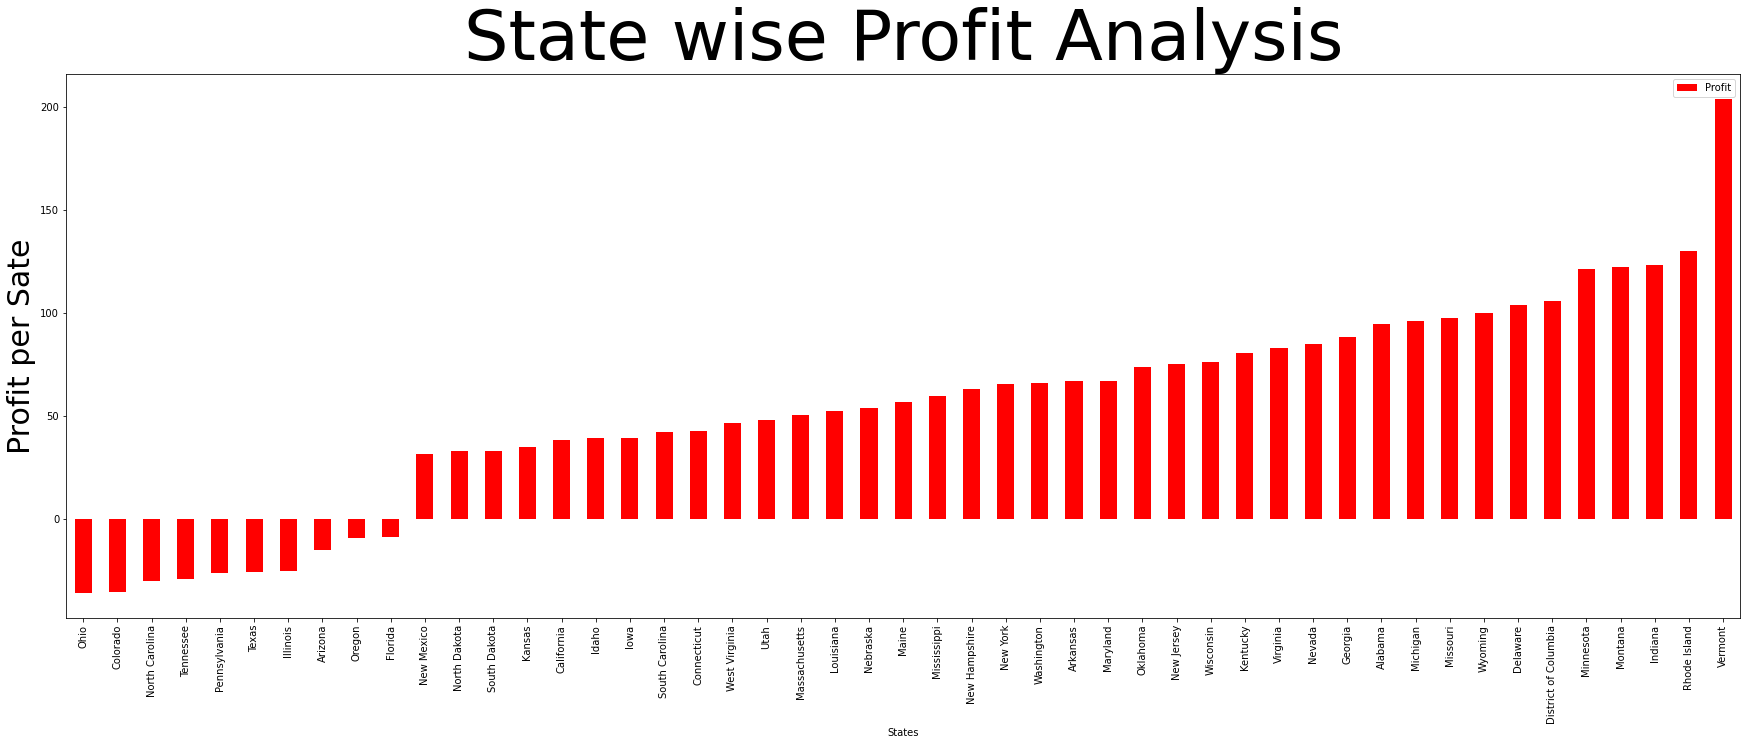

In [22]:
State_1= state_data.sort_values('Profit')

State_1[['Profit']].plot(kind = 'bar', figsize=(30,10),color= 'red')
plt.title('State wise Profit Analysis', fontsize = 70)
plt.ylabel('Profit per Sate', fontsize=30)
plt.xlabel('States')
plt.show()

# Plotted graph for State wise Sales Analysis

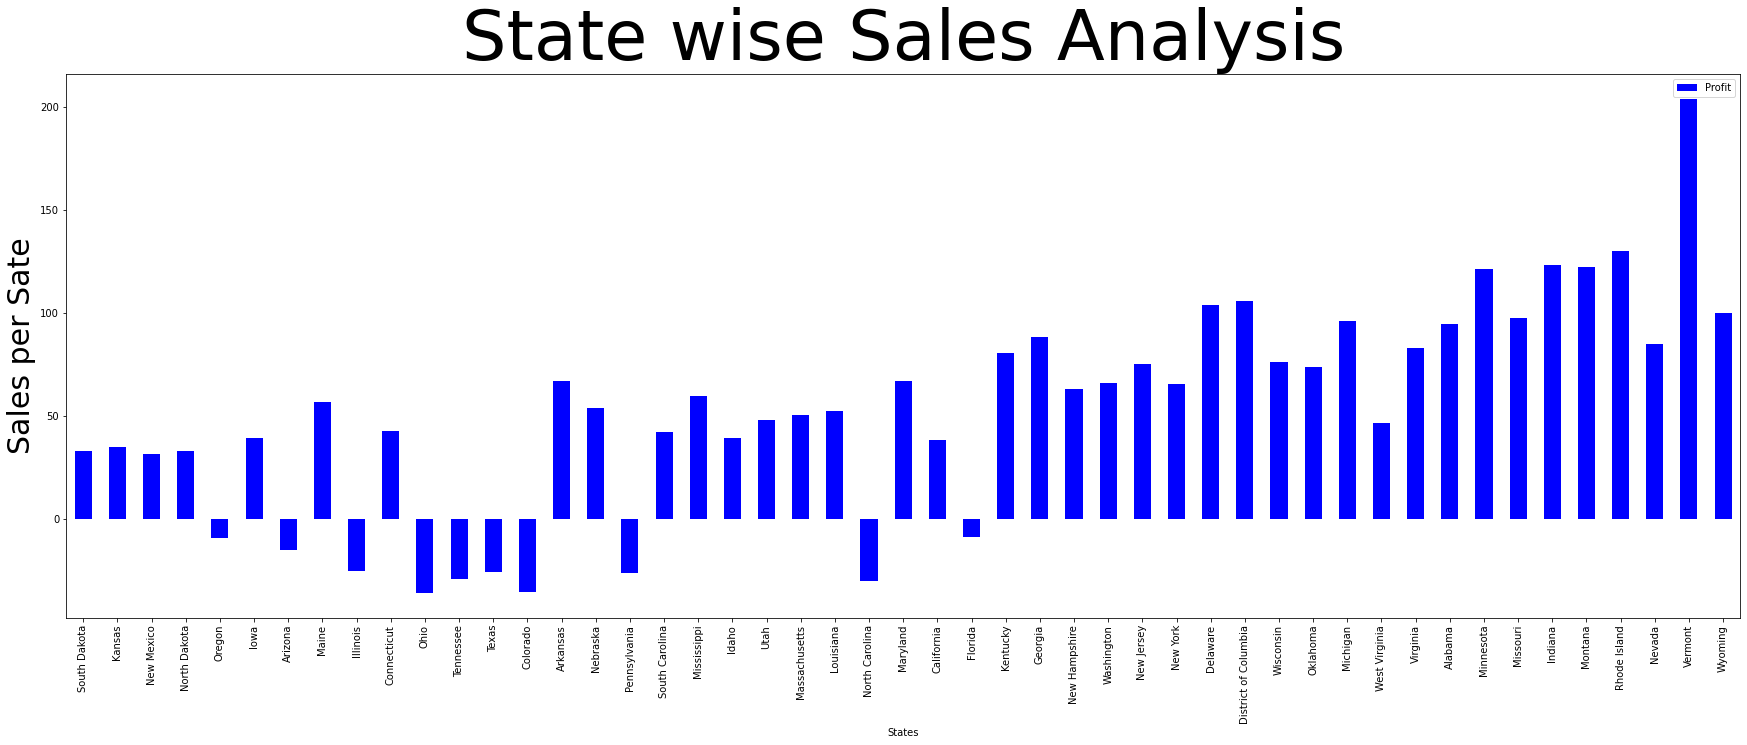

In [23]:
State_1= state_data.sort_values('Sales')

State_1[['Profit']].plot(kind = 'bar', figsize=(30,10),color= 'blue')
plt.title('State wise Sales Analysis', fontsize = 70)
plt.ylabel('Sales per Sate', fontsize=30)
plt.xlabel('States')
plt.show()

# Region wise Graph is plotted for the profit analysis

In [24]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [25]:
Region_data= data.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
Region_data.head()

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


Text(0.5, 1.0, 'Region wise analysis of Sale, Discount, profit')

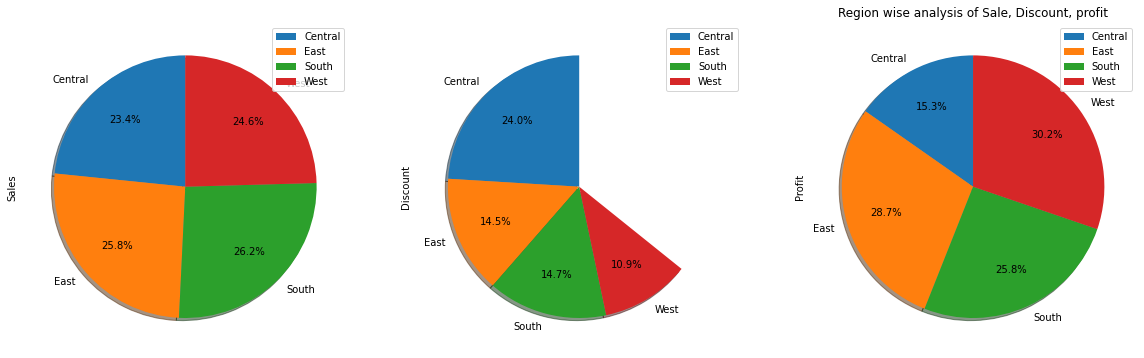

In [26]:
Region_data.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = Region_data.index)
plt.title('Region wise analysis of Sale, Discount, profit')


# Category wise plotting

In [27]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [28]:
Category_data= data.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
Category_data.head()

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


Text(0.5, 1.0, 'Category wise analysis of Sale, Discount, profit')

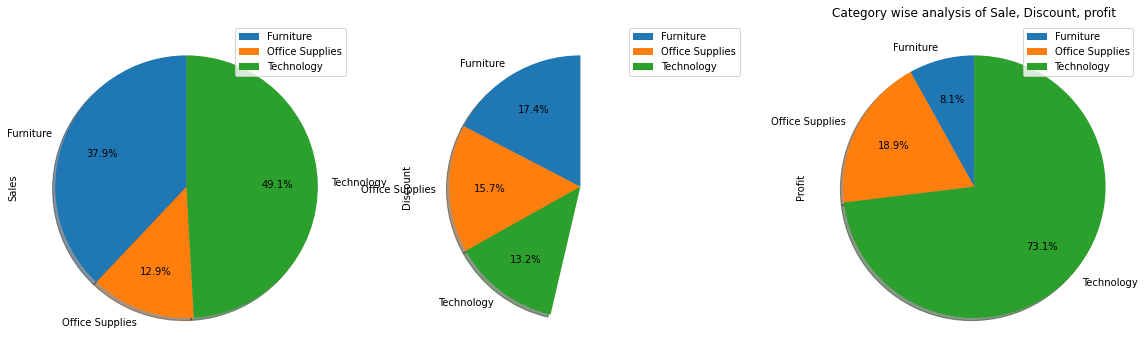

In [29]:
Category_data.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = Category_data.index)
plt.title('Category wise analysis of Sale, Discount, profit')

# Plotted graph as per city to analyze the sales, discounts and profit

In [30]:
data['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Hagerstown           1
Holyoke              1
Elyria               1
San Luis Obispo      1
Atlantic City        1
Name: City, Length: 531, dtype: int64

In [31]:
City_data= data.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
City_data.head(10)

,Sales,Discount,Profit
City,,,
Aberdeen,25.500000,0.000000,6.630000
Abilene,1.392000,0.800000,-3.758400
Akron,129.999333,0.357143,-8.887410
Albuquerque,158.582857,0.057143,45.292007
Alexandria,344.973125,0.000000,19.913644
Allen,72.551500,0.375000,-9.969375
Allentown,121.893143,0.271429,-32.350057
Altoona,10.225500,0.450000,-0.591750
Amarillo,377.306280,0.272000,-38.796830


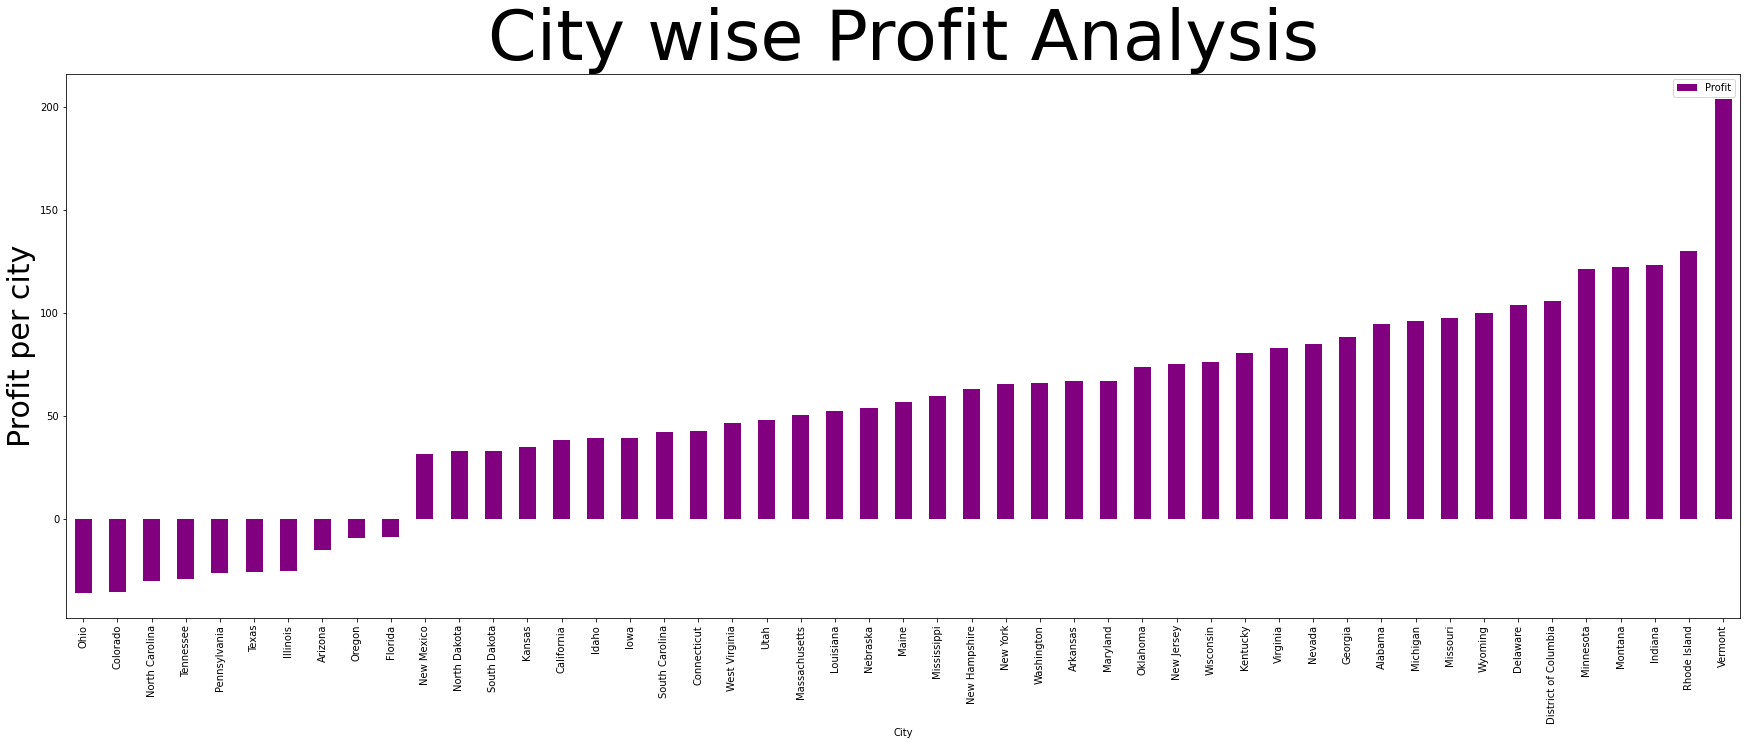

In [32]:
City_1= state_data.sort_values('Profit')

City_1[['Profit']].plot(kind = 'bar', figsize=(30,10),color= 'purple')
plt.title('City wise Profit Analysis', fontsize = 70)
plt.ylabel('Profit per city', fontsize=30)
plt.xlabel('City')
plt.show()